




# Author : Sumon Singh








# Company : 
   
   ### The Spark Foundation
   
   


# Job-Role :
  
  ###  Data Science And Business Analyst 
   



# Job-Type :
  
  ###  Internship
  
  
  




# Task 1 :   
   
   
   ### Prediction using Supervised ML
   
   


### ** Predict the percentage of an student based on the no. of study hours.


### ** This is a simple linear regression task as it involves just 2 variables.


### ** Data can be found at http://bit.ly/w-data


### ** What will be predicted score if a student studies for 9.25 hrs/ day?



## Import Libraries



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
%matplotlib inline
print('Setup Completed')

Setup Completed


## Load Dataset

In [3]:
url='http://bit.ly/w-data'
df=pd.read_csv(url)

## Analyse The Dataset

In [4]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000




## Vizualize The Dataset



<AxesSubplot:>

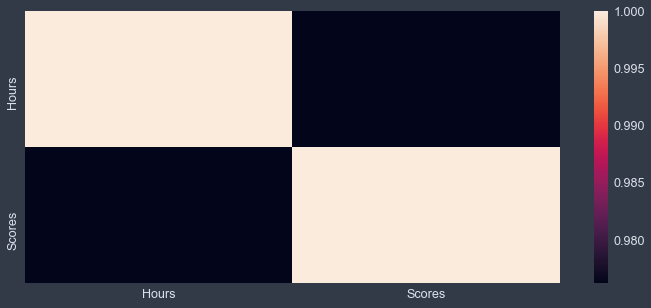

In [8]:
jtplot.style()
plt.figure(figsize=(12,5))
sns.heatmap(df.corr())

Text(0, 0.5, 'Scores')

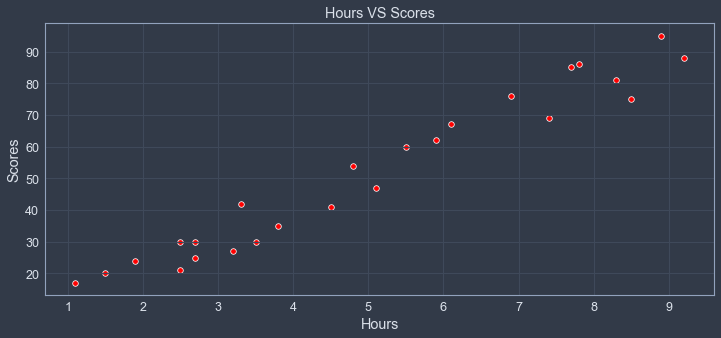

In [9]:
jtplot.style()
plt.figure(figsize=(12,5))
sns.scatterplot(x=df['Hours'],y=df['Scores'],color='red')
plt.title('Hours VS Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')

Text(0, 0.5, 'Scores')

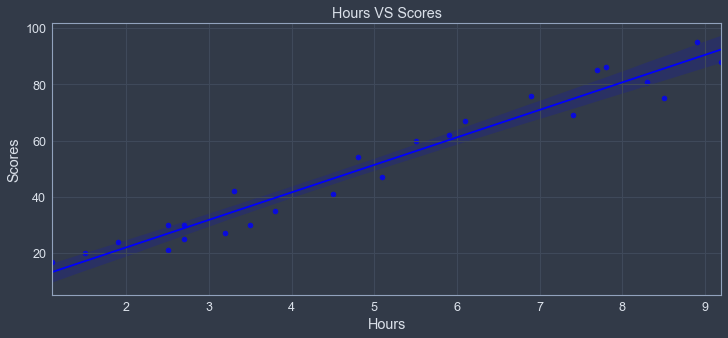

In [10]:
jtplot.style()
plt.figure(figsize=(12,5))
sns.regplot(x=df['Hours'],y=df['Scores'],color='blue')
plt.title('Hours VS Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')

Text(0.5, 1.0, 'Histogram For Scores')

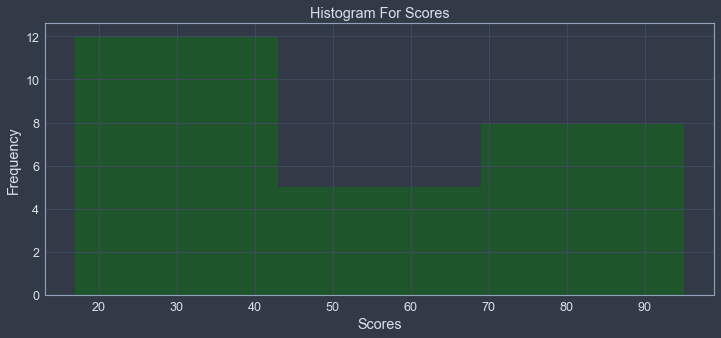

In [11]:
jtplot.style()
plt.figure(figsize=(12,5))
sns.distplot(df['Scores'],kde=False,color='green')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Histogram For Scores')

Text(0.5, 1.0, 'Histogram For Hours')

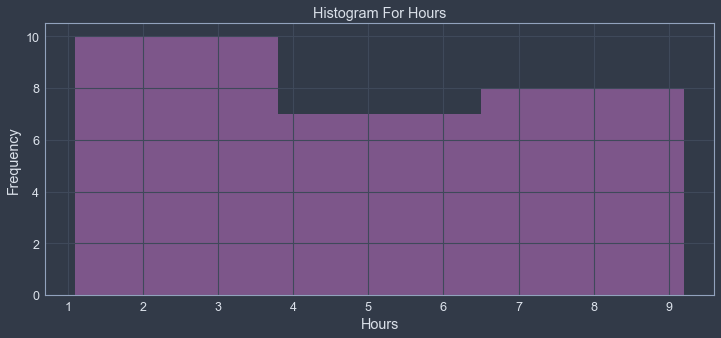

In [12]:
jtplot.style()
plt.figure(figsize=(12,5))
sns.distplot(df['Hours'],kde=False,color='violet')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Histogram For Hours')

### Import Libraries For Creating Model

In [13]:
X=df.iloc[:,:1].values
Y=df.iloc[:,1:].values

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

### Divide The Dataset Into Training And Testing Dataset

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

### Create LinearRegression Model And Fit The Training Set

In [17]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

### Predict The Scores For Hours Of Testing Dataset

In [18]:
y_predict=lm.predict(x_test)

In [19]:
y_predict

array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

### Check How Accurate The Model Is

In [20]:
lm.intercept_

array([2.37081538])

In [21]:
lm.coef_

array([[9.78856669]])

In [22]:
lm.score(x_test,y_test)

0.9568211104435257

In [23]:
y_actual=np.array(y_test)
y_actual=y_actual.reshape(-1,)
y_pre=np.array(y_predict)
y_pre=y_pre.reshape(-1,)

In [24]:
df1=pd.DataFrame({'Actual':y_actual,'Predicted':y_pre})
df1

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


Text(0, 0.5, 'Scores')

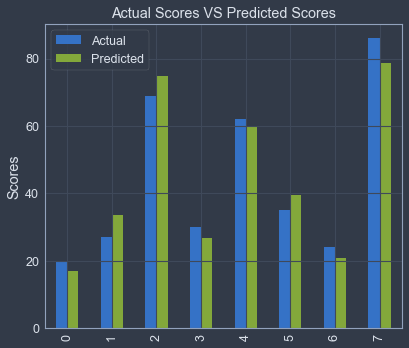

In [25]:
jtplot.style()
df1.plot(kind='bar')
plt.title('Actual Scores VS Predicted Scores')
plt.ylabel('Scores')

### Model Evulation (Error Of the Model)

In [26]:
error=mean_absolute_error(y_test,y_predict)

In [27]:
error

4.419727808027652

### Check The Model For Your Own Data ( What will be predicted score if a student studies for 9.25 hrs/ day? )

In [28]:
hour=[[9.5]]
num=lm.predict(hour)
print('The Student may score :',num)

The Student may score : [[95.36219891]]
